In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [17]:
A = 1
B = 3
omega = 2*np.pi/10
N = 50

In [18]:
t = np.linspace(0,10,N)
#t
r = np.zeros((N,3))

In [19]:
r[:,0] = A*np.cos(omega*t)
r[:,1] = A*np.sin(omega*t)
r[:,2] = B*t

<IPython.core.display.Javascript object>


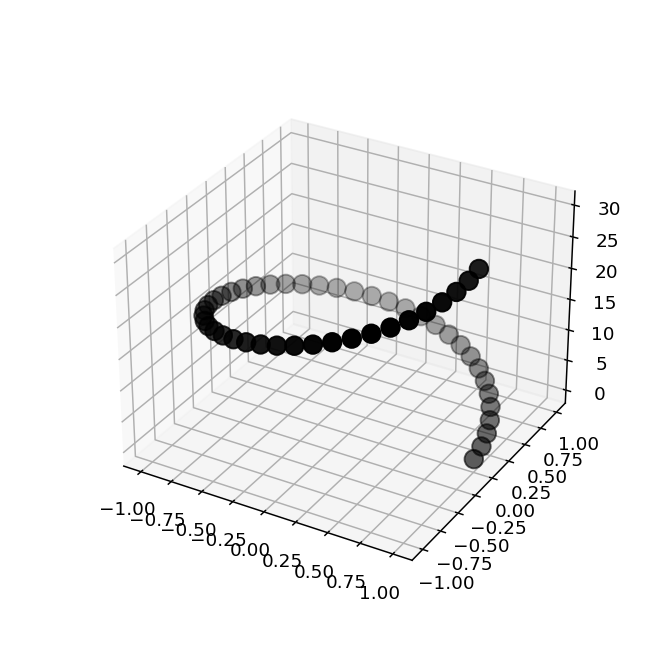

In [25]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(r[:,0],r[:,1],r[:,2],color='k',marker='o',s=100)
ax.view_init()

In [32]:
theta = np.linspace(0,2*np.pi,100)
r = 2*theta
r = (0.1)/(1-0.1*np.cos(theta))

<IPython.core.display.Javascript object>


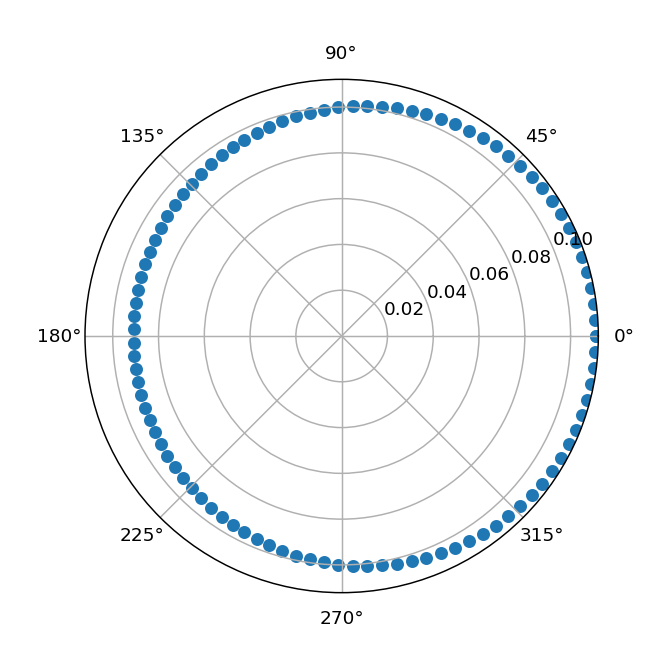

In [33]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,projection='polar')
ax.scatter(theta,r)

In [64]:
n = 20
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
X,Y = np.meshgrid(x,y)
X

array([[0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ],
       [0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ],
       [0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ],
       [0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0

In [72]:
r0 = np.array([0.5,0.4])
r2 = np.array([0.6,0.4])

In [69]:
def GetE(r,r0,q=1,c=0):
    
    d = (r[0] - r0[0])**2 + (r[1] - r0[1])**2
    
    return q*(r[c]-r0[c])/d**(3/2)

In [76]:
Ex = np.zeros((n,n))
Ey = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        Ex[i,j] = GetE([x[i],y[j]],r0,1,0)
        Ey[i,j] = GetE([x[i],y[j]],r0,1,1)
        
        Ex[i,j] += GetE([x[i],y[j]],r2,-1,0)
        Ey[i,j] += GetE([x[i],y[j]],r2,-1,1)

<IPython.core.display.Javascript object>


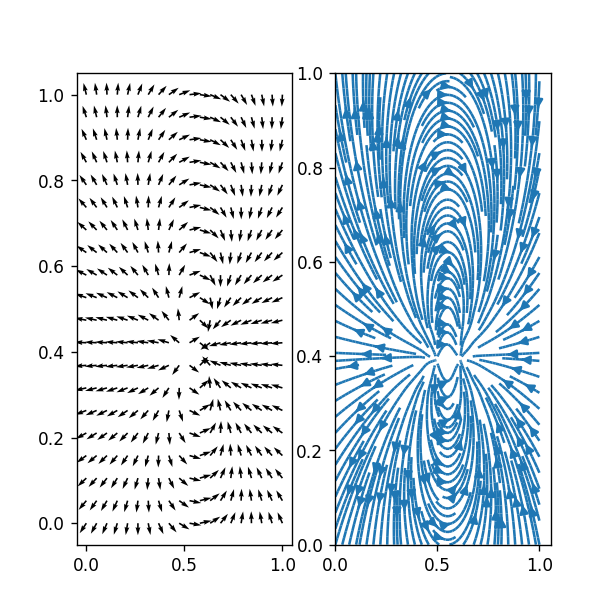

In [77]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

#ax.scatter(X,Y)

for i in range(n):
    for j in range(n):
        ax.quiver(x[i],y[j],Ex[i,j],Ey[i,j])
        
ax1.streamplot(X,Y,Ex.T,Ey.T,density=2)